# Spark feature generation

In [1]:
%load_ext autoreload
%matplotlib inline

In [29]:
import os, sys
import numpy as np
import pandas as pd
import json
from IPython.display import display
sys.path.append(os.path.abspath(os.path.join('../..')))

import plot.evaluation
from database.CERNMongoClient import CERNMongoClient
from database.CERNSparkClient import CERNSparkClient
from preprocessing import feature_extraction
from pipeline import pipeline
from anomaly_detection import factory

# auto-load changes in imported modules
%autoreload 2

## Demo of working data retrieval

In [3]:
dbs = CERNSparkClient(spark,sc)

In [4]:
df=dbs.query("MKI.*5L2.B1:TEMP_MAGNET_UP$",spark,filters=True)

In [6]:
features = feature_extraction.build_features(dbs,beam=1,spark=spark, end_datetime="2015-08-22 00:00:00")

Building features for beam B1 from 2015-06-22 00:00:00 to 2015-08-22 00:00:00
| MONTH 0
|| Fetching continuous data
Fetching data for pattern ^MKI\.(A|B|C|D).*\.B1:.* from 2015-06-21 00:00:00.000 to 2015-07-22 00:00:00.000

Fetching data for pattern ^LHC\.BCTFR\.A6R4\.B1:BEAM_INTENSITY from 2015-06-21 00:00:00.000 to 2015-07-22 00:00:00.000

Fetching data for pattern ^LHC\.BQM\.B1:BUNCH_LENGTH_MEAN from 2015-06-21 00:00:00.000 to 2015-07-22 00:00:00.000

|| Fetching non-continuous data
Fetching data for pattern ^MKI\.UA23\.IPOC\.(A|B|C|D)B1:.* from 2015-06-22 00:00:00.000 to 2015-07-22 00:00:00.000

|| Joining data
|| Computing & joining sliding window MEAN DIFF
|| Original length: 13719, Current length: 13719

| MONTH 1
|| Fetching continuous data
Fetching data for pattern ^MKI\.(A|B|C|D).*\.B1:.* from 2015-07-21 00:00:00.000 to 2015-08-22 00:00:00.000

Fetching data for pattern ^LHC\.BCTFR\.A6R4\.B1:BEAM_INTENSITY from 2015-07-21 00:00:00.000 to 2015-08-22 00:00:00.000

Fetching data

In [10]:
with open('features.json', 'w') as f:
    f.write(features.to_json())

In [11]:
with open('features.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)

In [14]:
# Warning: the data seems to be slightly off after reading...
df.index.name = 'timestamp'
df.index = pd.to_datetime(df.index,unit='ms')
display(df.head())

LHC.BCTFR.A6R4.B1:BEAM_INTENSITY  \
timestamp                                               
2015-06-22 16:14:40                               0.0   
2015-06-22 16:14:50                               0.0   
2015-06-22 16:15:00                               0.0   
2015-06-22 16:15:10                               0.0   
2015-06-22 16:15:20                               0.0   

                     LHC.BCTFR.A6R4.B1:BEAM_INTENSITY:SW_MEAN_DIFF_600_s  \
timestamp                                                                  
2015-06-22 16:14:40                                                0.0     
2015-06-22 16:14:50                                                0.0     
2015-06-22 16:15:00                                                0.0     
2015-06-22 16:15:10                                                0.0     
2015-06-22 16:15:20                                                0.0     

                     LHC.BQM.B1:BUNCH_LENGTH_MEAN  \
timestamp                                           
2015-06-22 16:14:40                           0.0   
2015-06-22 16:14:50                           0.0   
2015-06-22 16:15:00                           0.0   
2015-06-22 16:15:10                           0.0   
2015-06-22 16:15:20                           0.0   

                     LHC.BQM.B1:BUNCH_LENGTH_MEAN:SW_MEAN_DIFF_600_s  \
timestamp                                                              
2015-06-22 16:14:40                                              0.0   
2015-06-22 16:14:50                                              0.0   
2015-06-22 16:15:00                                              0.0   
2015-06-22 16:15:10                                              0.0   
2015-06-22 16:15:20                                              0.0   

                     MKI.A5L2.B1:PRESSURE  \
timestamp                                   
2015-06-22 16:14:40          1.000000e-10   
2015-06-22 16:14:50          1.000000e-10   
2015-06-22 16:15:00          1.000000e-10   
2015-06-22 16:15:10          1.000000e-10   
2015-06-22 16:15:20          1.000000e-10   

                     MKI.A5L2.B1:PRESSURE:SW_MEAN_DIFF_600_s  \
timestamp                                                      
2015-06-22 16:14:40                             1.628512e-24   
2015-06-22 16:14:50                             1.628512e-24   
2015-06-22 16:15:00                             1.628512e-24   
2015-06-22 16:15:10                             1.628512e-24   
2015-06-22 16:15:20                             1.628512e-24   

                     MKI.A5L2.B1:TEMP_MAGNET_DOWN  \
timestamp                                           
2015-06-22 16:14:40                          22.3   
2015-06-22 16:14:50                          22.3   
2015-06-22 16:15:00                          22.3   
2015-06-22 16:15:10                          22.3   
2015-06-22 16:15:20                          22.3   

                     MKI.A5L2.B1:TEMP_MAGNET_DOWN:SW_MEAN_DIFF_600_s  \
timestamp                                                              
2015-06-22 16:14:40                                              0.0   
2015-06-22 16:14:50                                              0.0   
2015-06-22 16:15:00                                              0.0   
2015-06-22 16:15:10                                              0.0   
2015-06-22 16:15:20                                              0.0   

                     MKI.A5L2.B1:TEMP_MAGNET_UP  \
timestamp                                         
2015-06-22 16:14:40                        21.0   
2015-06-22 16:14:50                        21.0   
2015-06-22 16:15:00                        21.0   
2015-06-22 16:15:10                        21.0   
2015-06-22 16:15:20                        21.0   

                     MKI.A5L2.B1:TEMP_MAGNET_UP:SW_MEAN_DIFF_600_s  \
timestamp                                                            
2015-06-22 16:14:40                                            0.0   
2

In [20]:
# SET ANOMALY DETECTOR AND PARAMETERS
anomaly_detector = "gmm"
detector_parameters = {
        "n_components": 6,
        "covariance_type": "full",
        "tol": 1e-3,
        "reg_covar": 1e-6,
        "max_iter": 100,
        "n_init": 3,
        "init_params": 'kmeans',
        "weights_init": None,
        "means_init": None,
        "precisions_init": None,
        "random_state": None,
        "warm_start": False,
        "verbose": 1,
        "verbose_interval": 10
}

detector = factory.AnomalyDetectorFactory.create(anomaly_detector, **detector_parameters)

|| GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=6, n_init=3, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=1,
        verbose_interval=10, warm_start=False, weights_init=None)
|| scale_data = True
Initialization 0


/cvmfs/sft.cern.ch/lcg/views/LCG_94python3/x86_64-slc6-gcc62-opt/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True
Initialization 1
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True
Initialization 2
  Iteration 0
  Iteration 10
  Iteration 20
Initialization converged: True


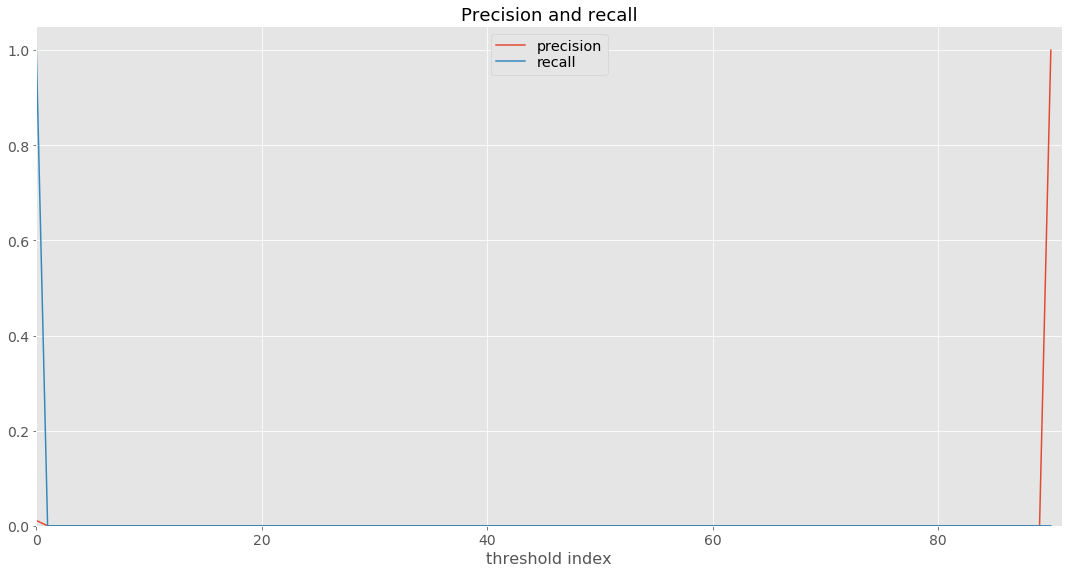

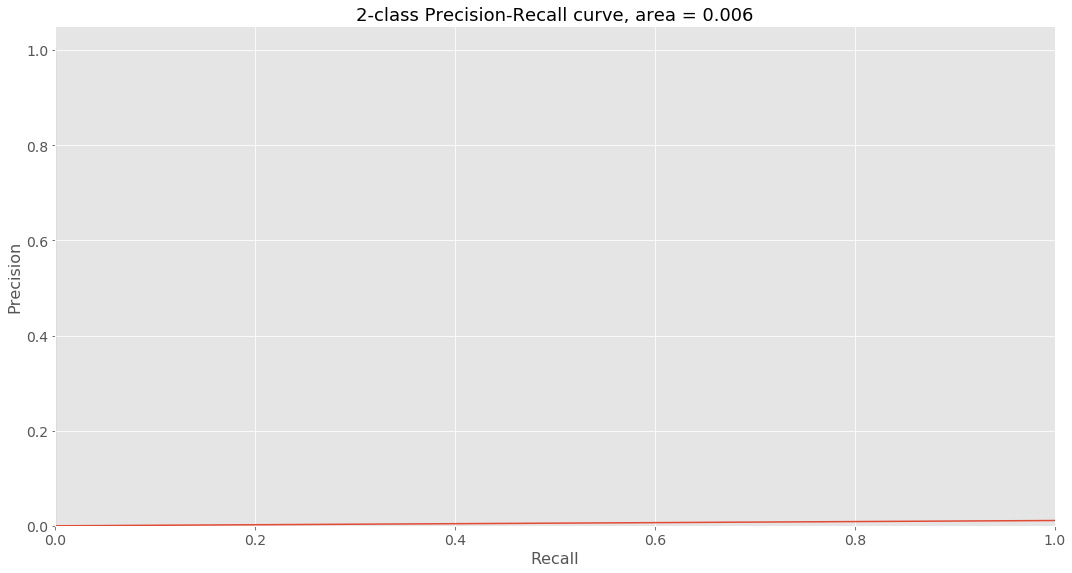

In [23]:
labels = dbs.query_elogbook_anomalies(beam=1)
truth_and_pred_df, auc, precision, recall, thresholds, execution_time = pipeline.pipeline(features, labels, anomaly_detector, detector_parameters)

MAKING PREDICTIONS FOR THRESHOLD: 0.19478513052983043
TP:     0 | FP:     5  || sum:    5
FN:     1 | TN:   487  || sum:  488
PRECISION: 0.00, RECALL: 0.00



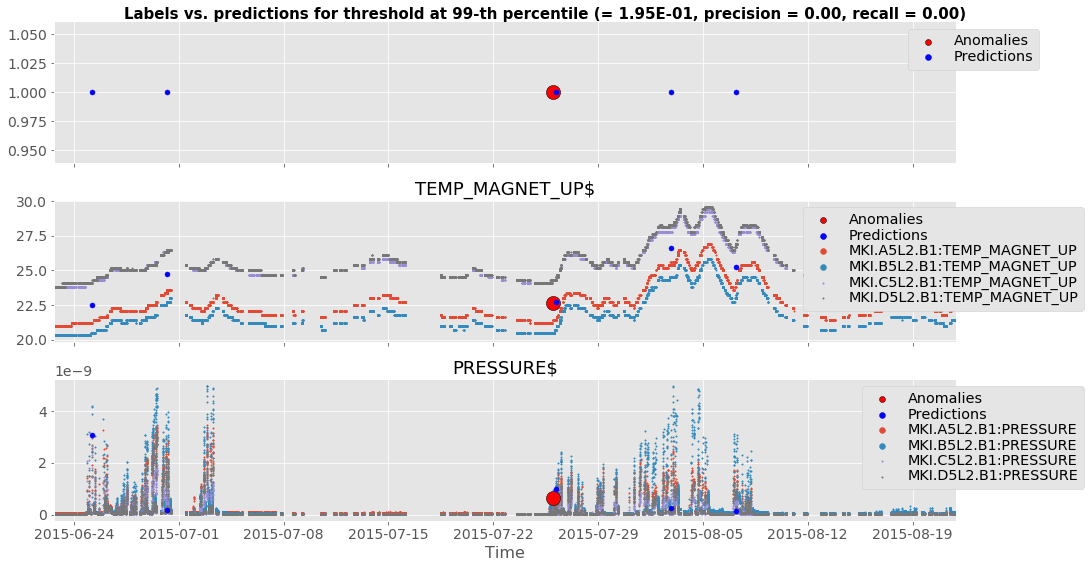

MAKING PREDICTIONS FOR THRESHOLD: 0.16017258744721097
TP:     0 | FP:    10  || sum:   10
FN:     1 | TN:   482  || sum:  483
PRECISION: 0.00, RECALL: 0.00



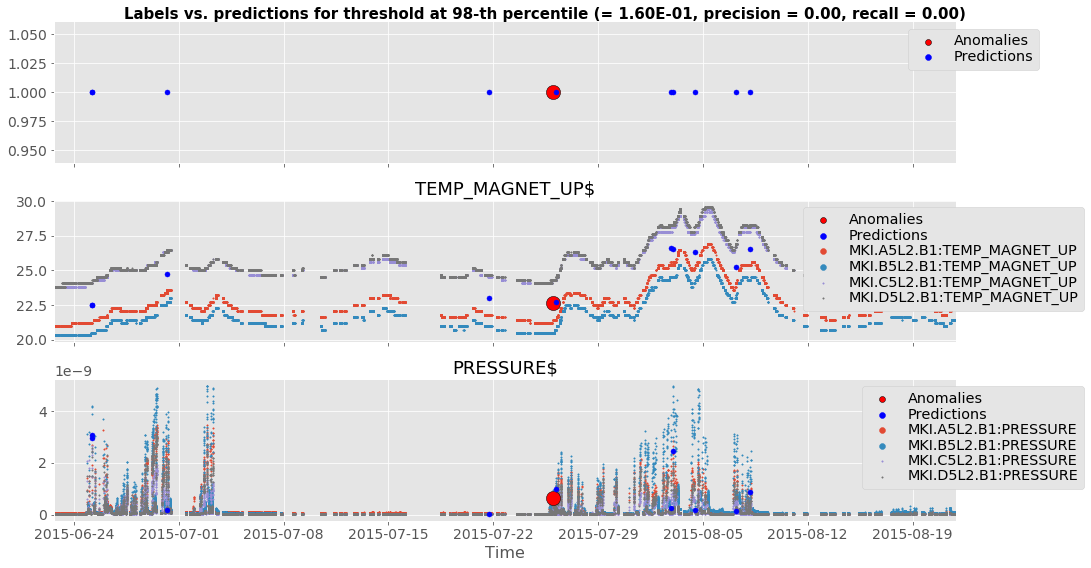

MAKING PREDICTIONS FOR THRESHOLD: 0.13645554020931097
TP:     0 | FP:    25  || sum:   25
FN:     1 | TN:   467  || sum:  468
PRECISION: 0.00, RECALL: 0.00



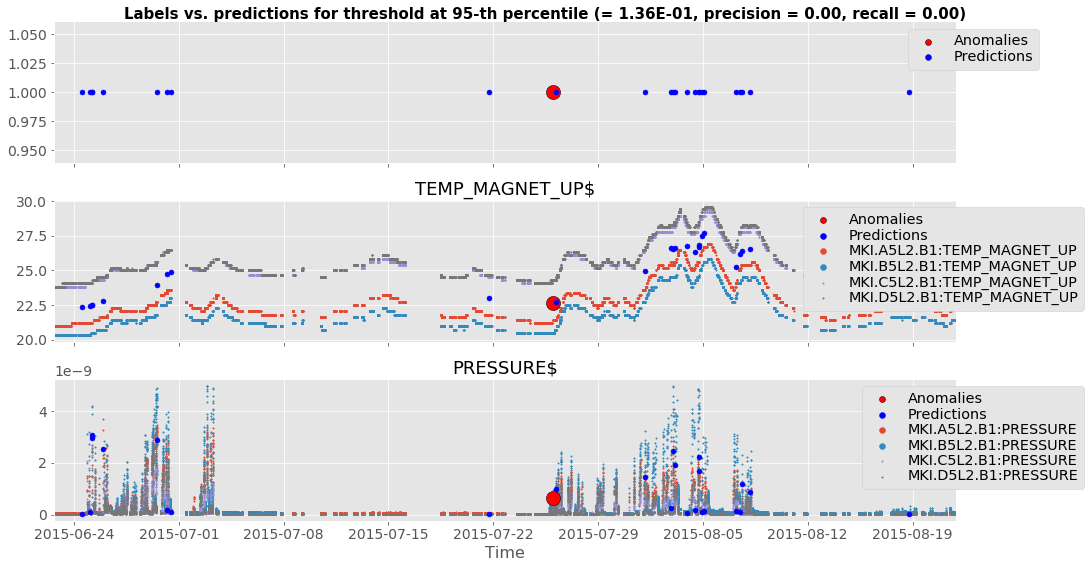

In [30]:
# Features to plot the labels and predictions on
feature_regexes = [regex for regex in ["TEMP_MAGNET_UP$", "PRESSURE$"]
                           if len(features.filter(regex=regex).columns) > 0]
plot.evaluation.labels_vs_predictions_for_different_thresholds(
            truth_and_pred_df=truth_and_pred_df,
            features=features,
            feature_regexes=feature_regexes,
            show=True)